In [43]:
library('tidyverse')
library('psych')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.3.0
✔ tibble  1.4.2     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.4.3”Warning message:
“package ‘tidyr’ was built under R version 3.4.3”Warning message:
“package ‘stringr’ was built under R version 3.4.3”Warning message:
“package ‘forcats’ was built under R version 3.4.3”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ stringr::boundary() masks strucchange::boundary()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


In [8]:
df <- read.csv("data_arifs_2.csv", header=T) # load data 

In [7]:
head(df)

sample,litho,elev,turb,col,dhl,tds,ph,hard,ca,⋯,na,li,nh4,co3,hco3,cl,so4,no2,no3,source
Pang1,volc,850,0.6,0,98,68,6.9,45.4,13.9,⋯,9.7,0,0.5,0.00,76.3,3.5,0.00,0.0,0.3,Susanto (2017)
Pang2,volc,850,6.1,24,91,60,6.8,42.1,15.8,⋯,9.2,0,0.3,0.00,69.5,5.1,1.40,0.0,0.0,Irawan et al. (2015)
Bdg1,volc,700,0.5,0,210,200,6.0,55.0,14.2,⋯,10.1,0,0.8,0.05,72.0,110.0,0.08,0.1,1.2,Irawan et al. (2015)
Bdg2,volc,700,0.4,0,230,200,6.0,53.0,13.9,⋯,10.2,0,0.8,0.04,73.0,112.0,0.09,0.2,1.1,Irawan et al. (2015)
Bdg3,volc,625,0.4,0,240,210,6.3,54.0,14.0,⋯,9.5,0,0.9,0.10,73.5,121.0,0.07,0.2,1.2,Irawan et al. (2015)
Bdg4,volc,600,0.5,0,256,210,6.2,54.0,14.1,⋯,9.5,0,1.1,0.09,75.0,120.3,0.08,0.3,1.3,Irawan et al. (2015)


In [9]:
dim(df)

[1] 20 24

In [22]:
df_num <- subset(df, select = -c(1,2,16,24))
df_num

elev,turb,col,dhl,tds,ph,hard,ca,mg,fe3,mn,k,na,nh4,co3,hco3,cl,so4,no2,no3
850,0.6,0,98,68,6.9,45.4,13.9,2.6,0.00,0.01,2.3,9.7,0.5,0.00,76.3,3.5,0.00,0.0,0.3
850,6.1,24,91,60,6.8,42.1,15.8,0.6,0.86,0.24,1.6,9.2,0.3,0.00,69.5,5.1,1.40,0.0,0.0
700,0.5,0,210,200,6.0,55.0,14.2,0.8,0.90,0.21,2.1,10.1,0.8,0.05,72.0,110.0,0.08,0.1,1.2
700,0.4,0,230,200,6.0,53.0,13.9,1.2,0.78,0.22,2.0,10.2,0.8,0.04,73.0,112.0,0.09,0.2,1.1
625,0.4,0,240,210,6.3,54.0,14.0,1.3,0.88,0.23,2.3,9.5,0.9,0.10,73.5,121.0,0.07,0.2,1.2
600,0.5,0,256,210,6.2,54.0,14.1,1.2,0.90,0.23,2.3,9.5,1.1,0.09,75.0,120.3,0.08,0.3,1.3
600,0.3,0,300,280,6.0,55.0,14.3,1.4,0.89,0.24,2.4,9.6,1.2,0.10,75.0,125.6,0.08,0.3,1.2
590,0.4,0,325,285,6.0,53.0,14.5,0.9,0.87,0.25,2.5,9.8,1.5,0.10,76.5,135.4,0.20,0.4,1.4
590,0.3,0,480,410,6.0,53.0,14.0,0.8,0.85,0.24,2.3,9.8,1.5,0.08,77.0,143.5,0.20,0.4,1.3
580,0.3,0,550,515,5.8,54.0,13.8,1.1,0.89,0.23,2.2,10.3,1.4,0.09,74.3,134.3,0.30,0.4,1.3


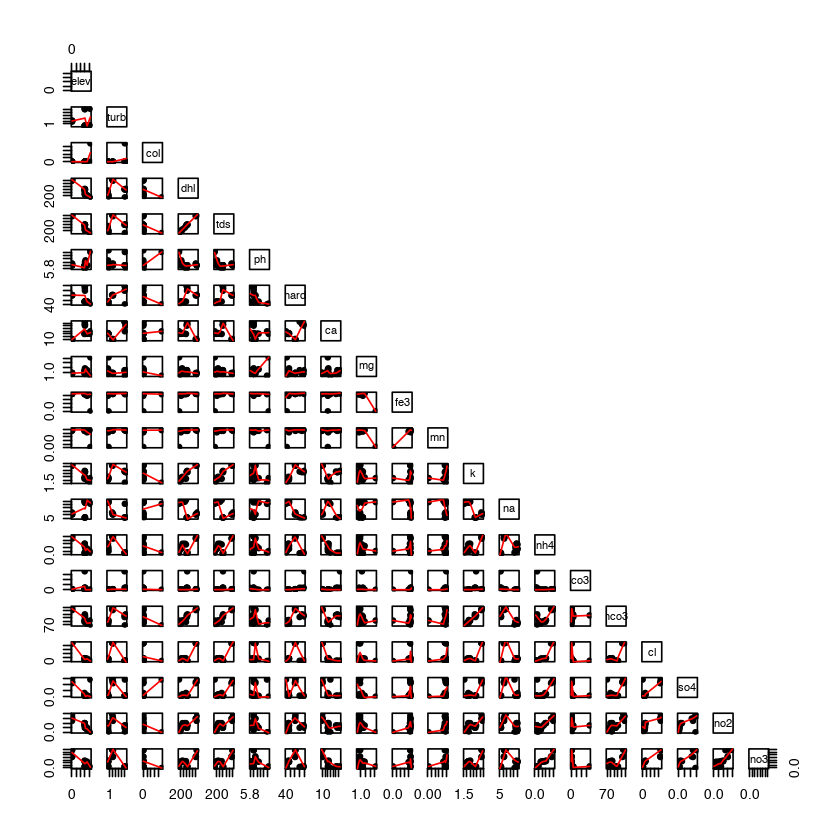

In [23]:
cor.tab <- cor(df_num)
pairs(df_num,
      lower.panel=panel.smooth, 
      upper.panel=NULL, 
      pch=20)

In [14]:
install.packages('GGally')
library('GGally')

also installing the dependencies ‘prettyunits’, ‘progress’




The downloaded binary packages are in
	/var/folders/1d/lmv6zvsx7cq4l1j20rf9n8b80000gn/T//Rtmplu0m2w/downloaded_packages


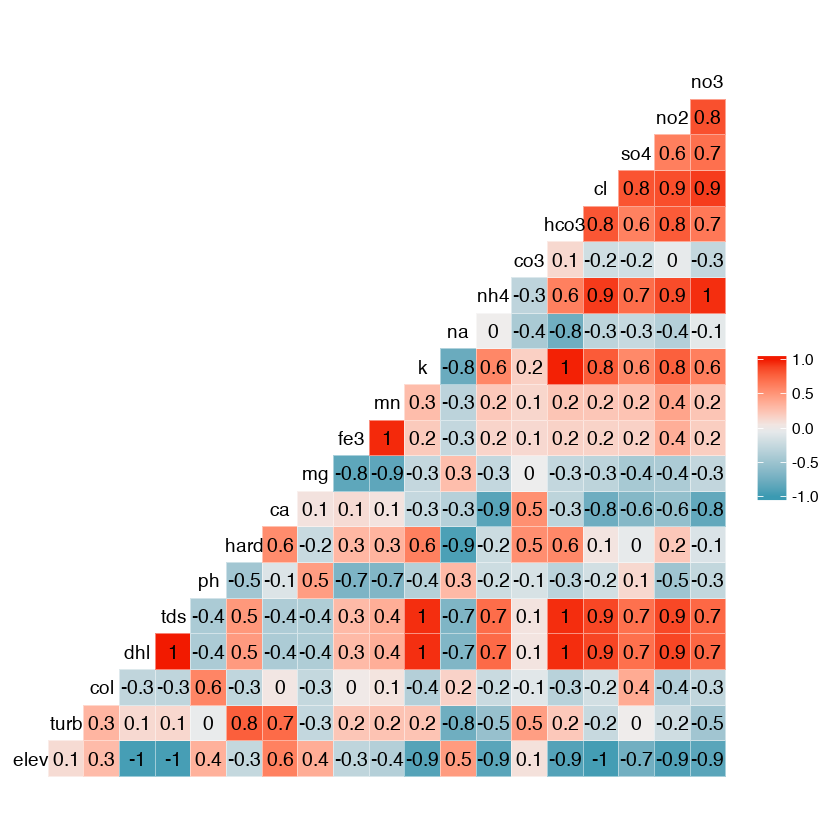

In [24]:
ggcorr(df_num, palette = "RdBu", label = TRUE)

# PCA

In [25]:
# Loading library
library('pcaMethods') # for pcaMethods package
library('cluster') # for cluster analysis
library("FactoMineR")
library("factoextra")
library('vegan')

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [26]:
res.pca <- PCA(df_num, graph = FALSE)

In [27]:
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 20 individuals, described by 20 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

In [28]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,9.7296032857,48.648016428,48.64802
Dim.2,4.6449194913,23.224597457,71.87261
Dim.3,2.5045328606,12.522664303,84.39528
Dim.4,1.9486465663,9.743232832,94.13851
Dim.5,0.6398418586,3.199209293,97.33772
Dim.6,0.1443065776,0.721532888,98.05925
Dim.7,0.1286621449,0.643310725,98.70256
Dim.8,0.1037549996,0.518774998,99.22134
Dim.9,0.0613532050,0.306766025,99.52810
Dim.10,0.0342338053,0.171169026,99.69927


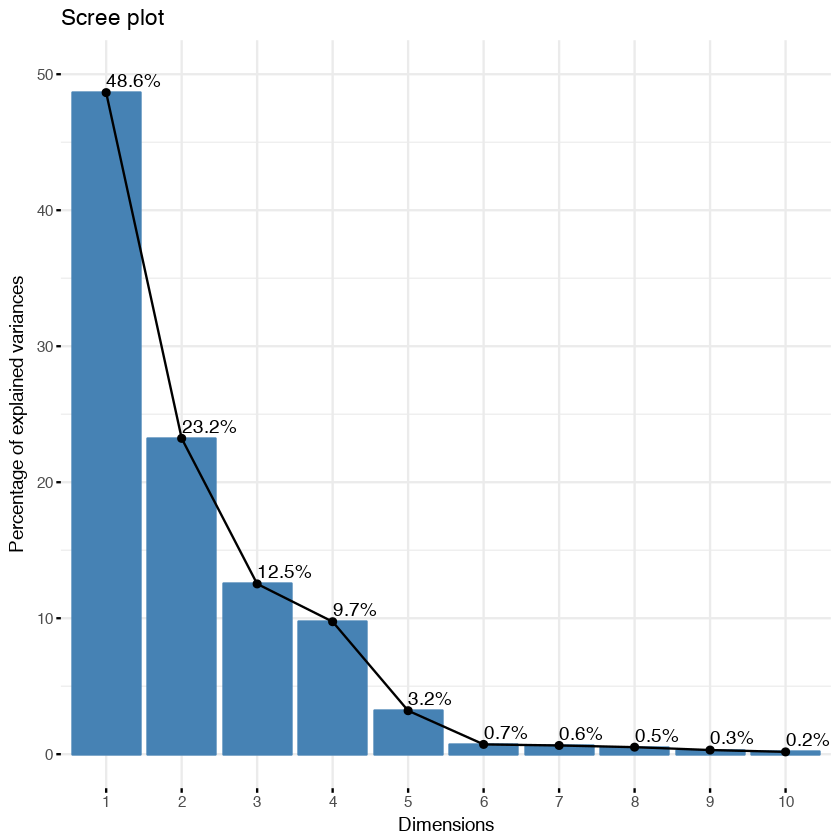

In [29]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

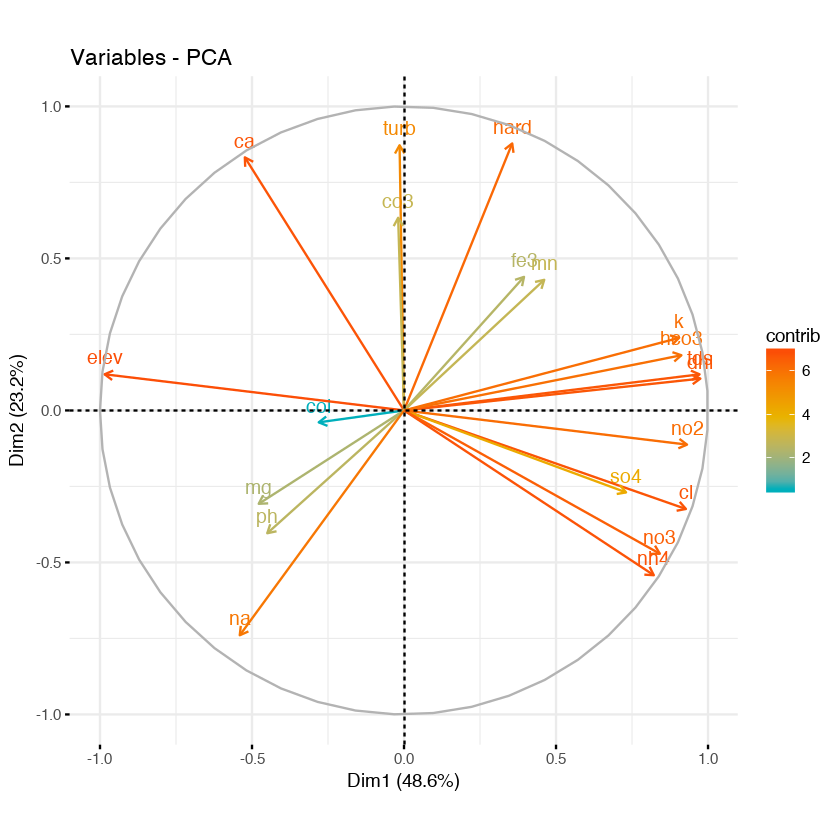

In [32]:
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

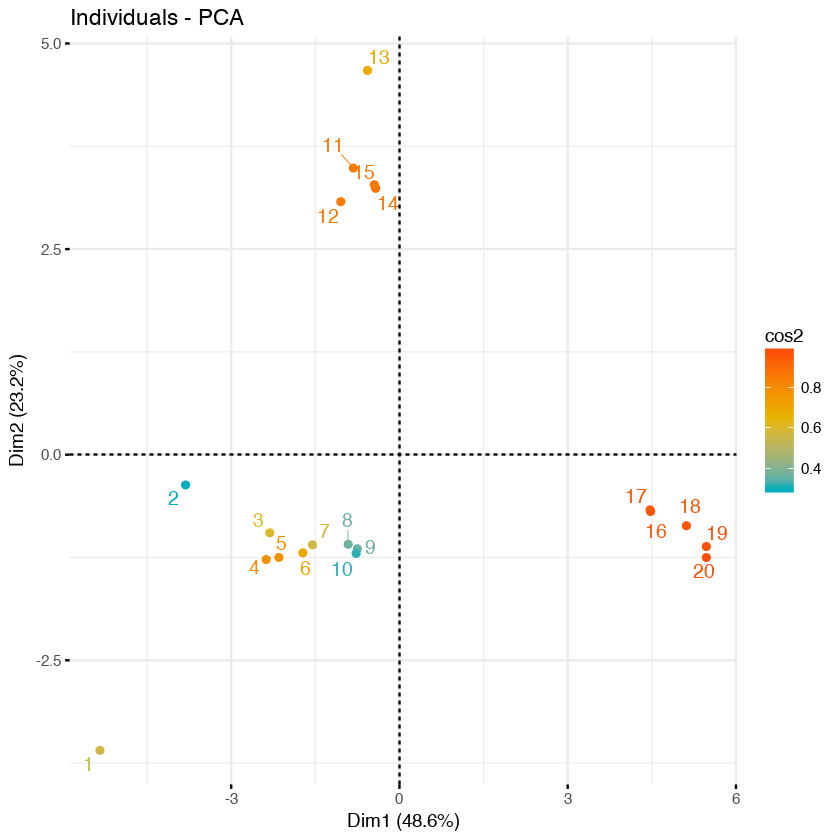

In [35]:
fviz_pca_ind(res.pca, 
             col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

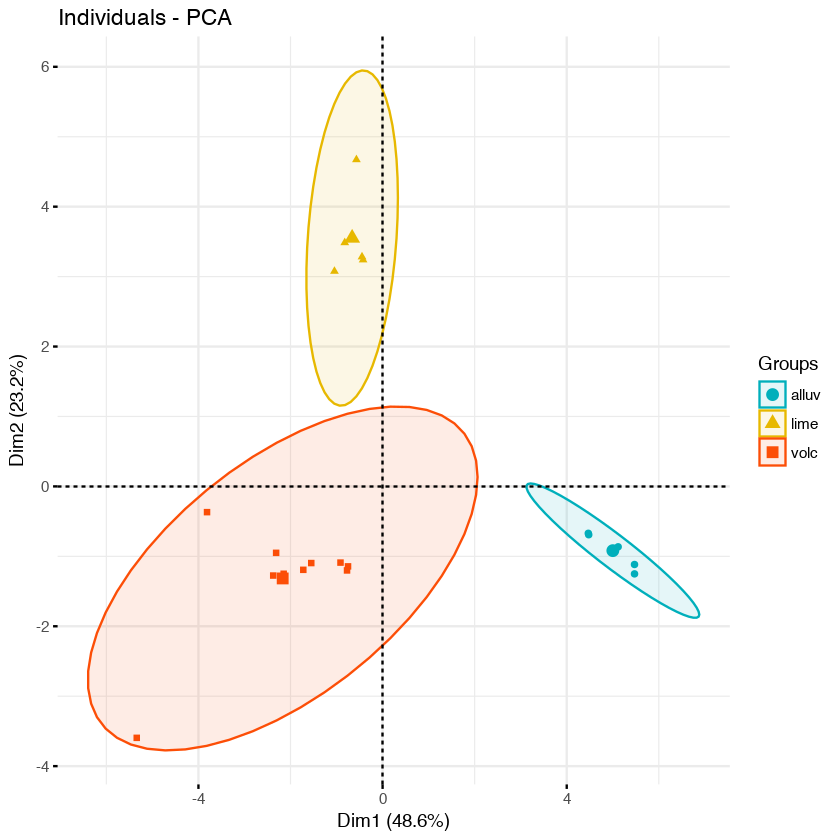

In [36]:
fviz_pca_ind(res.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = df$litho, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
             )

# CA

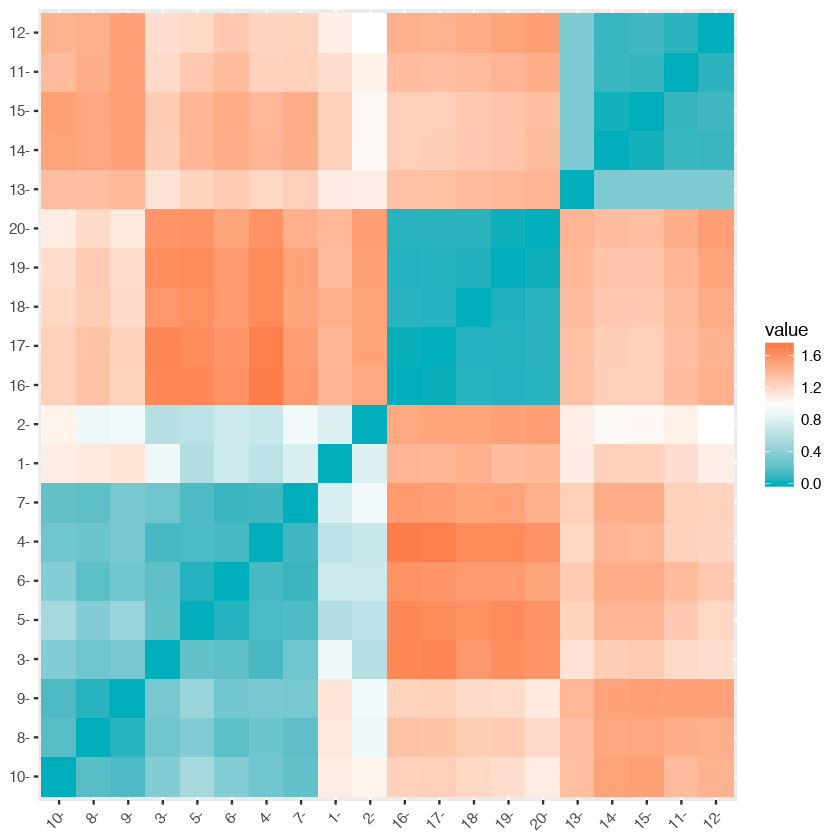

In [37]:
res.dist <- get_dist(df_num, stand = TRUE, method = "pearson")
fviz_dist(res.dist, 
   gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

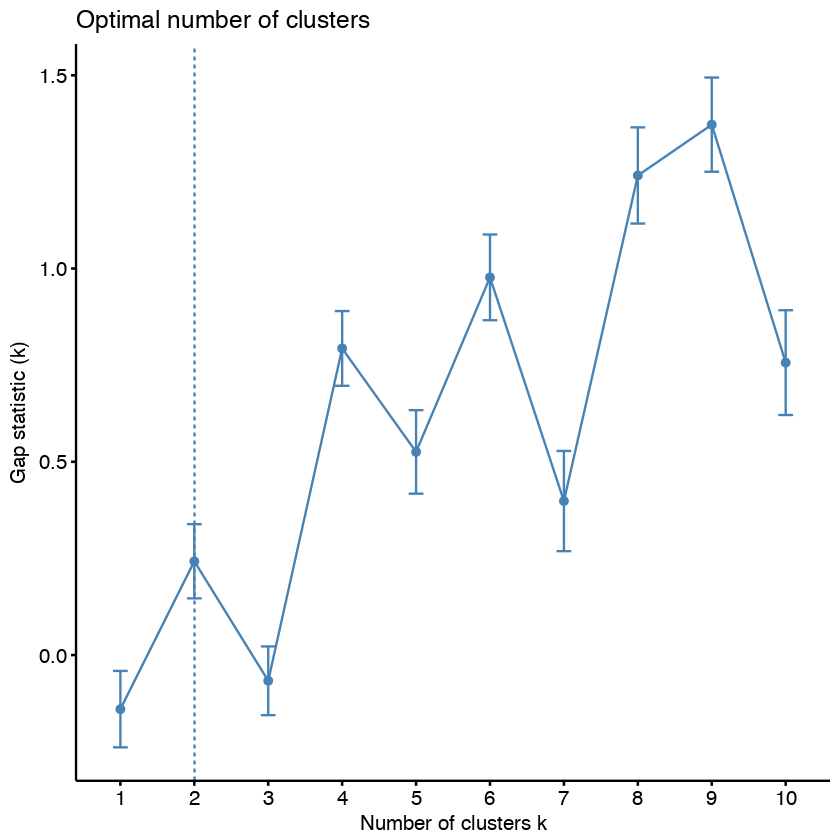

In [38]:
fviz_nbclust(df_num, kmeans, method = "gap_stat")

In [39]:
km.res <- kmeans(df_num, 3, nstart = 25)

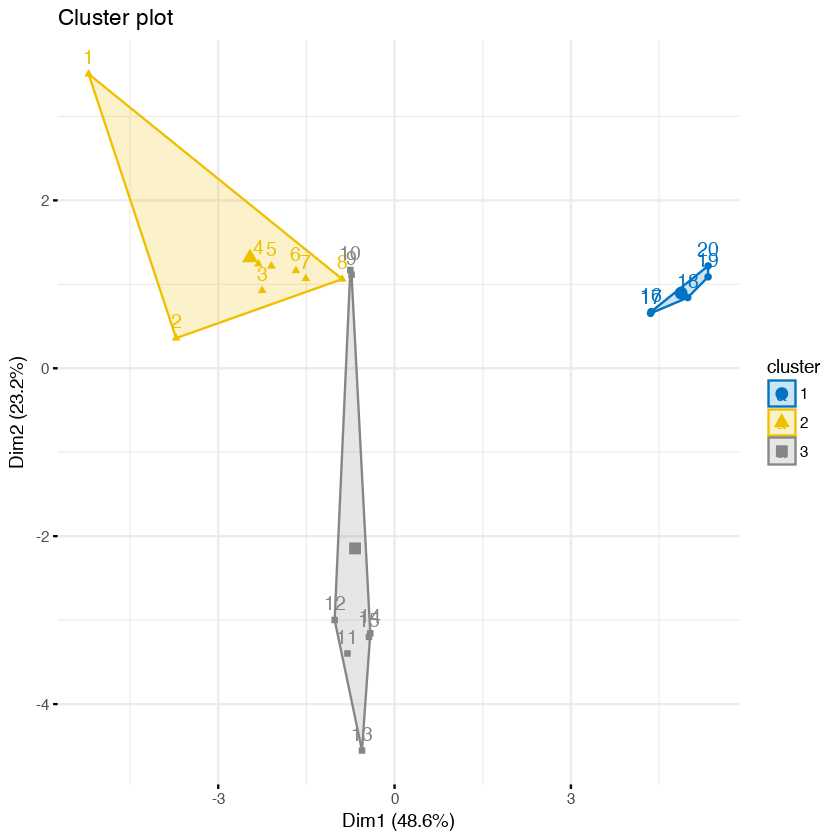

In [40]:
fviz_cluster(km.res, data = df_num,
             ellipse.type = "convex",
             palette = "jco",
             ggtheme = theme_minimal())

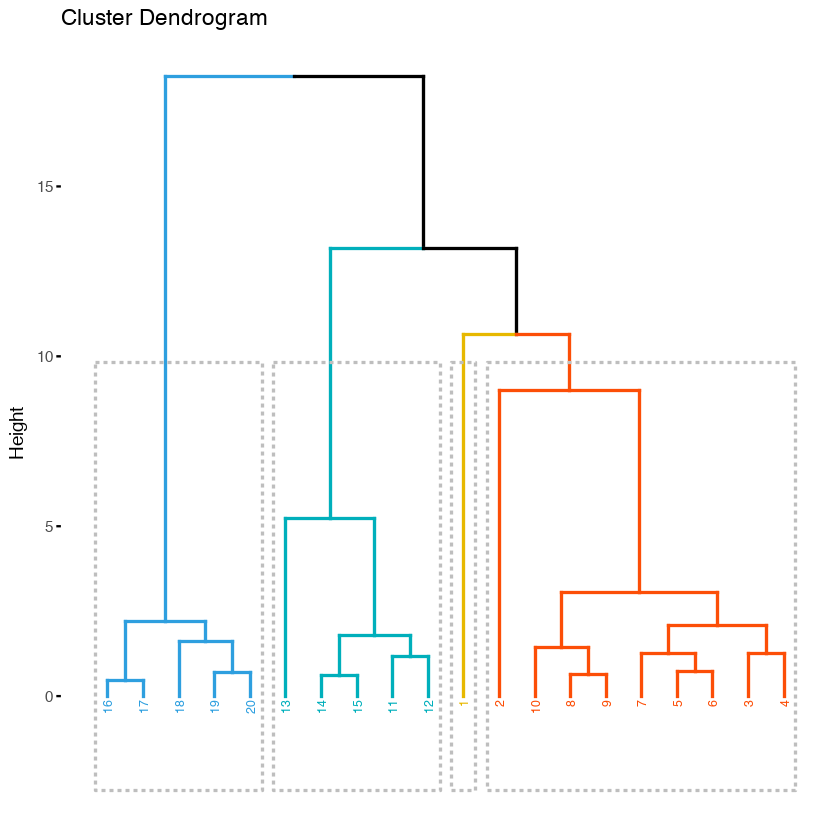

In [49]:
# Compute hierarchical clustering
res.hc <- df_num %>%
  scale() %>%                    # Scale the data
  dist(method = "euclidean") %>% # Compute dissimilarity matrix
  hclust(method = "ward.D2")     # Compute hierachical clustering
# Visualize using factoextra
# Cut in 4 groups and color by groups
fviz_dend(res.hc, k = 4, # Cut in four groups
          cex = 0.5, # label size
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
          color_labels_by_k = TRUE, # color labels by groups
          rect = TRUE # Add rectangle around groups
          )

# MULTIPLE REGRESSION

## step wise lm

In [52]:
install.packages('caret') #for easy machine learning workflow
library('caret')


The downloaded binary packages are in
	/var/folders/1d/lmv6zvsx7cq4l1j20rf9n8b80000gn/T//Rtmplu0m2w/downloaded_packages


In [54]:
install.packages('leaps')
library('leaps') #for computing stepwise regression

In [56]:
head(df_num)

elev,turb,col,dhl,tds,ph,hard,ca,mg,fe3,mn,k,na,nh4,co3,hco3,cl,so4,no2,no3
850,0.6,0,98,68,6.9,45.4,13.9,2.6,0.00,0.01,2.3,9.7,0.5,0.00,76.3,3.5,0.00,0.0,0.3
850,6.1,24,91,60,6.8,42.1,15.8,0.6,0.86,0.24,1.6,9.2,0.3,0.00,69.5,5.1,1.40,0.0,0.0
700,0.5,0,210,200,6.0,55.0,14.2,0.8,0.90,0.21,2.1,10.1,0.8,0.05,72.0,110.0,0.08,0.1,1.2
700,0.4,0,230,200,6.0,53.0,13.9,1.2,0.78,0.22,2.0,10.2,0.8,0.04,73.0,112.0,0.09,0.2,1.1
625,0.4,0,240,210,6.3,54.0,14.0,1.3,0.88,0.23,2.3,9.5,0.9,0.10,73.5,121.0,0.07,0.2,1.2
600,0.5,0,256,210,6.2,54.0,14.1,1.2,0.90,0.23,2.3,9.5,1.1,0.09,75.0,120.3,0.08,0.3,1.3


## this bit is not working

In [67]:
library('MASS')

In [68]:
# Stepwise regression model
step.model <- stepAIC(full.model, direction = "both", 
                      trace = FALSE)

ERROR: Error in terms(object): object 'full.model' not found


In [69]:
summary(step.model)

Subset selection object
19 Variables  (and intercept)
     Forced in Forced out
elev     FALSE      FALSE
turb     FALSE      FALSE
col      FALSE      FALSE
dhl      FALSE      FALSE
ph       FALSE      FALSE
hard     FALSE      FALSE
ca       FALSE      FALSE
mg       FALSE      FALSE
fe3      FALSE      FALSE
mn       FALSE      FALSE
k        FALSE      FALSE
na       FALSE      FALSE
nh4      FALSE      FALSE
co3      FALSE      FALSE
hco3     FALSE      FALSE
cl       FALSE      FALSE
so4      FALSE      FALSE
no2      FALSE      FALSE
no3      FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: backward
         elev turb col dhl ph  hard ca  mg  fe3 mn  k   na  nh4 co3 hco3 cl 
1  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " " " " " " " " " " "  " "
2  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " "*" " " " " " " " "  " "
3  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " "*" " " " " " " "*"  " "
4  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " "*" "

In [83]:
lmMod <- lm(tds ~ . , data = df_num)

In [84]:
selectedMod <- step(lmMod) 

ERROR: Error in step(lmMod): AIC is -infinity for this model, so 'step' cannot proceed


In [85]:
summary(selectedMod)

ERROR: Error in summary(selectedMod): object 'selectedMod' not found


**Note: maybe this bit halts the calculation**

`stop("AIC is -infinity for this model, so 'step' cannot proceed")`

## the following bits work

In [70]:
models <- regsubsets(tds~., data = df_num, nvmax = 5,
                     method = "seqrep")
summary(models)

Subset selection object
Call: regsubsets.formula(tds ~ ., data = df_num, nvmax = 5, method = "seqrep")
19 Variables  (and intercept)
     Forced in Forced out
elev     FALSE      FALSE
turb     FALSE      FALSE
col      FALSE      FALSE
dhl      FALSE      FALSE
ph       FALSE      FALSE
hard     FALSE      FALSE
ca       FALSE      FALSE
mg       FALSE      FALSE
fe3      FALSE      FALSE
mn       FALSE      FALSE
k        FALSE      FALSE
na       FALSE      FALSE
nh4      FALSE      FALSE
co3      FALSE      FALSE
hco3     FALSE      FALSE
cl       FALSE      FALSE
so4      FALSE      FALSE
no2      FALSE      FALSE
no3      FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: 'sequential replacement'
         elev turb col dhl ph  hard ca  mg  fe3 mn  k   na  nh4 co3 hco3 cl 
1  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " " " " " " " " " " "  " "
2  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " " " " " "*" " " " "  " "
3  ( 1 ) "*"  "*"  "*" " " " " " "  " "

In [71]:
# Set seed for reproducibility
set.seed(123)
# Set up repeated k-fold cross-validation
train.control <- trainControl(method = "cv", number = 10)
# Train the model
step.model <- train(tds ~., data = df_num,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:5),
                    trControl = train.control
                    )
step.model$results

Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”

Reordering variables and trying again:


Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“2  linear dependencies found”

nvmax,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,55.18873,1,45.16464,132.17580,0,104.35064
2,33.32426,1,29.25064,63.72335,0,55.55764
3,21.54497,1,18.77910,15.81567,0,15.85967
4,21.45150,1,18.35626,15.14055,0,14.51728
5,28.18778,1,22.98149,34.75508,0,27.22184


In [72]:
step.model$bestTune

,nvmax
4,4


In [73]:
summary(step.model$finalModel)

Subset selection object
19 Variables  (and intercept)
     Forced in Forced out
elev     FALSE      FALSE
turb     FALSE      FALSE
col      FALSE      FALSE
dhl      FALSE      FALSE
ph       FALSE      FALSE
hard     FALSE      FALSE
ca       FALSE      FALSE
mg       FALSE      FALSE
fe3      FALSE      FALSE
mn       FALSE      FALSE
k        FALSE      FALSE
na       FALSE      FALSE
nh4      FALSE      FALSE
co3      FALSE      FALSE
hco3     FALSE      FALSE
cl       FALSE      FALSE
so4      FALSE      FALSE
no2      FALSE      FALSE
no3      FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: backward
         elev turb col dhl ph  hard ca  mg  fe3 mn  k   na  nh4 co3 hco3 cl 
1  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " " " " " " " " " " "  " "
2  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " "*" " " " " " " " "  " "
3  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " "*" " " " " " " "*"  " "
4  ( 1 ) " "  " "  " " "*" " " " "  " " " " " " " " "*" "

In [74]:
coef(step.model$finalModel, 4)

(Intercept)         dhl           k          na        hco3 
305.2683228   0.9786156  50.7353556  -2.8547333  -5.6176794

In [75]:
lm(tds ~ dhl + k + na + hco3, 
   data = df_num)


Call:
lm(formula = tds ~ dhl + k + na + hco3, data = df_num)

Coefficients:
(Intercept)          dhl            k           na         hco3  
   305.2683       0.9786      50.7354      -2.8547      -5.6177  


## regression tree

In [ ]:
#library(readxl) # for opening data directly from xls format
library('rpart')
library('party')
library('gam')
library('mgcv')

In [77]:
# Regression tree
tree.fit <- rpart(tds ~ ., data = df_num, 
                  control=rpart.control(minsplit=2, minbucket=1, cp=0.001))

In [78]:
printcp(tree.fit) # display the results


Regression tree:
rpart(formula = tds ~ ., data = df_num, control = rpart.control(minsplit = 2, 
    minbucket = 1, cp = 0.001))

Variables actually used in tree construction:
[1] dhl  elev

Root node error: 3273039/20 = 163652

n= 20 

         CP nsplit  rel error   xerror      xstd
1 0.8176886      0 1.00000000 1.127519 0.2465587
2 0.1550842      1 0.18231143 0.205847 0.0439832
3 0.0127557      2 0.02722722 0.038178 0.0111556
4 0.0077926      3 0.01447147 0.033385 0.0108112
5 0.0024468      4 0.00667891 0.020838 0.0089719
6 0.0019717      5 0.00423215 0.019851 0.0090618
7 0.0016705      6 0.00226049 0.021015 0.0104263
8 0.0010000      7 0.00059002 0.019592 0.0106013


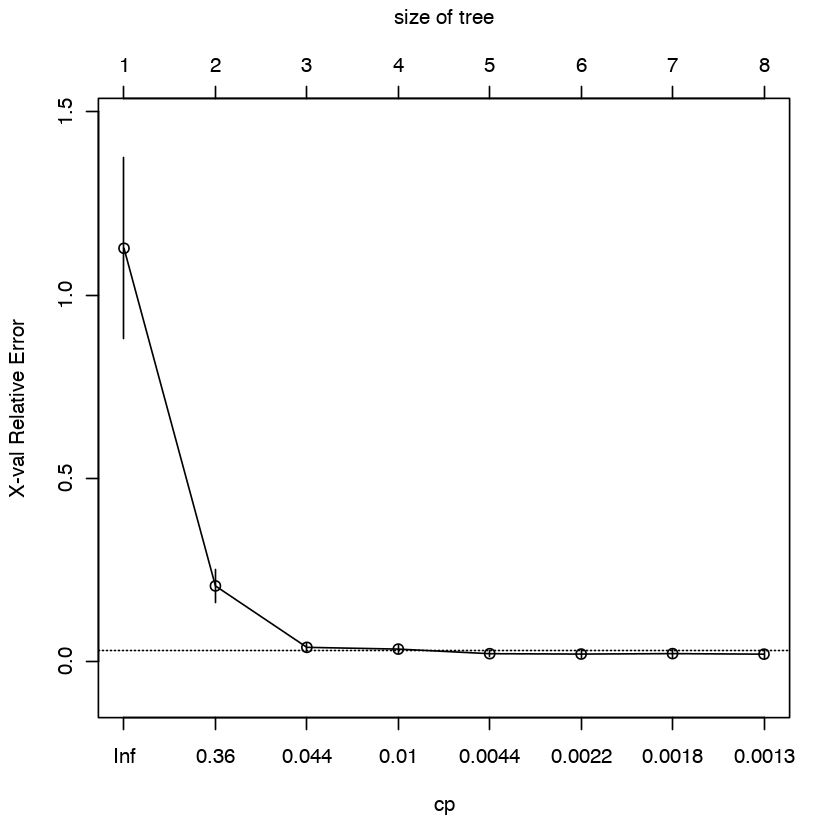

In [79]:
plotcp(tree.fit) # visualize cross-validation results

In [80]:
summary(tree.fit) # detailed summary of splits

Call:
rpart(formula = tds ~ ., data = df_num, control = rpart.control(minsplit = 2, 
    minbucket = 1, cp = 0.001))
  n= 20 

           CP nsplit    rel error     xerror        xstd
1 0.817688565      0 1.0000000000 1.12751884 0.246558701
2 0.155084220      1 0.1823114349 0.20584692 0.043983217
3 0.012755743      2 0.0272272153 0.03817784 0.011155586
4 0.007792562      3 0.0144714723 0.03338521 0.010811172
5 0.002446758      4 0.0066789105 0.02083816 0.008971854
6 0.001971664      5 0.0042321527 0.01985141 0.009061781
7 0.001670466      6 0.0022604885 0.02101501 0.010426256
8 0.001000000      7 0.0005900225 0.01959179 0.010601276

Variable importance
 dhl hco3   ca    k elev  nh4 hard   na 
  17   17   16   16   15   14    2    2 

Node number 1: 20 observations,    complexity param=0.8176886
  mean=572.4, MSE=163651.9 
  left son=2 (15 obs) right son=3 (5 obs)
  Primary splits:
      dhl  < 925   to the left,  improve=0.8176886, (0 missing)
      k    < 3.8   to the left,  improve=0

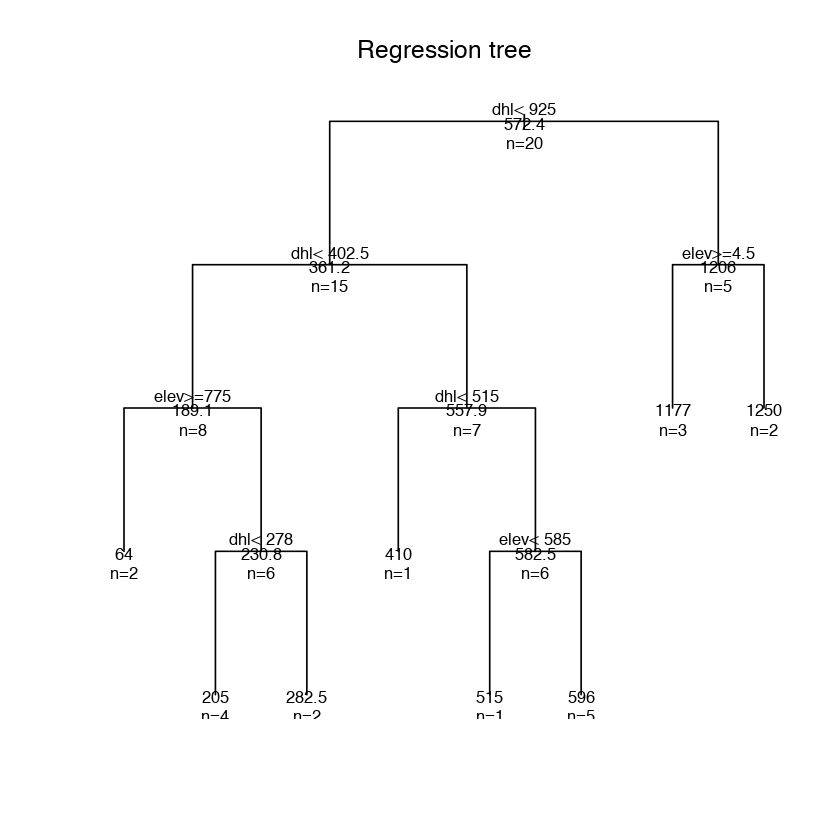

In [81]:
# plot tree
plot(tree.fit, uniform=TRUE,
     main="Regression tree")
text(tree.fit, use.n=TRUE, all=TRUE, cex=.8)

In [107]:
tree.fit <- rpart(elev ~ ., data = df_num, 
                  control=rpart.control(minsplit=2, minbucket=1, cp=0.001))

In [108]:
printcp(tree.fit) # display the results


Regression tree:
rpart(formula = elev ~ ., data = df_num, control = rpart.control(minsplit = 2, 
    minbucket = 1, cp = 0.001))

Variables actually used in tree construction:
[1] dhl

Root node error: 1647005/20 = 82350

n= 20 

        CP nsplit  rel error   xerror      xstd
1 0.929302      0 1.00000000 1.128645 0.2831678
2 0.059075      1 0.07069811 0.080256 0.0375915
3 0.010843      2 0.01162335 0.025349 0.0099431
4 0.001000      3 0.00078019 0.023835 0.0145399


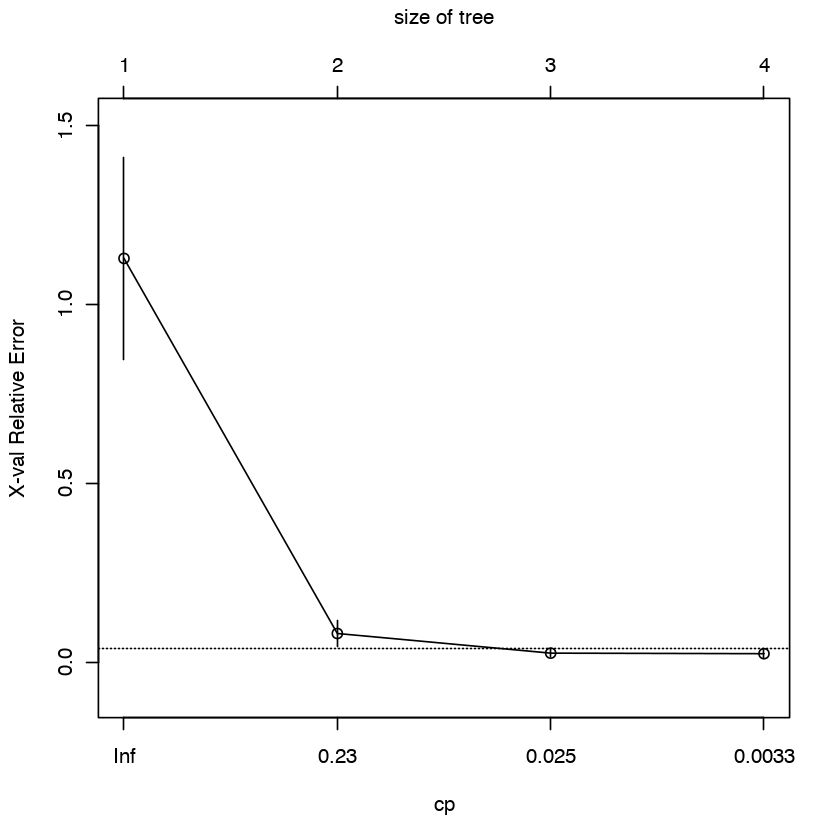

In [109]:
plotcp(tree.fit) # visualize cross-validation results

In [110]:
summary(tree.fit) # detailed summary of splits

Call:
rpart(formula = elev ~ ., data = df_num, control = rpart.control(minsplit = 2, 
    minbucket = 1, cp = 0.001))
  n= 20 

          CP nsplit    rel error     xerror        xstd
1 0.92930189      0 1.0000000000 1.12864500 0.283167842
2 0.05907475      1 0.0706981077 0.08025596 0.037591515
3 0.01084316      2 0.0116233549 0.02534918 0.009943097
4 0.00100000      3 0.0007801931 0.02383466 0.014539867

Variable importance
 dhl  tds hco3    k   ca  nh4  co3   cl hard   ph 
  17   17   16   16   16   16    1    1    1    1 

Node number 1: 20 observations,    complexity param=0.9293019
  mean=484.95, MSE=82350.25 
  left son=2 (5 obs) right son=3 (15 obs)
  Primary splits:
      dhl  < 925   to the right, improve=0.9293019, (0 missing)
      tds  < 880   to the right, improve=0.9293019, (0 missing)
      k    < 3.8   to the right, improve=0.9293019, (0 missing)
      nh4  < 1.85  to the right, improve=0.9293019, (0 missing)
      hco3 < 88    to the right, improve=0.9293019, (0 missin

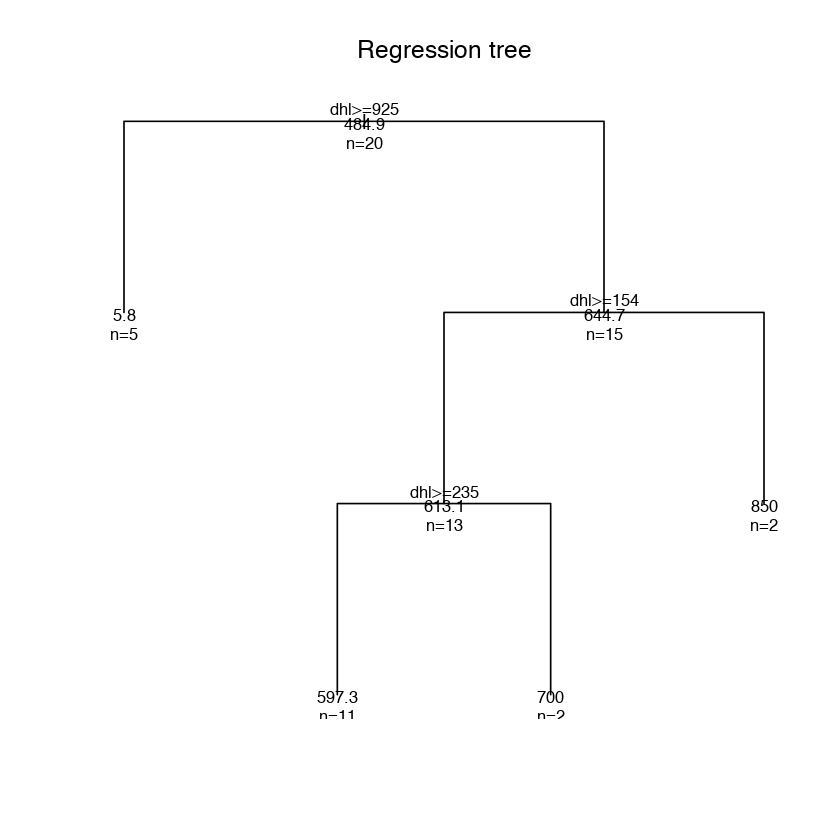

In [111]:
plot(tree.fit, uniform=TRUE,
     main="Regression tree")
text(tree.fit, use.n=TRUE, all=TRUE, cex=.8)

# gam party relaimpo not working

In [106]:
mod_lm <- gam(elev ~ ., data = df_num)

ERROR: Error in terms.formula(gf, specials = c("s", "te", "ti", "t2", extra.special)): '.' in formula and no 'data' argument


In [ ]:
summary(mod_lm)

## using `party` pkg

In [103]:
library(party)
cf1 <- cforest(elev ~ . , data= df_num, control=cforest_unbiased(mtry=2,ntree=50))

In [104]:
varimp(cf1)

turb  col  dhl  tds   ph hard   ca   mg  fe3   mn    k   na  nh4  co3 hco3   cl 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 so4  no2  no3 
   0    0    0

In [105]:
varimp(cf1, conditional=TRUE)

turb  col  dhl  tds   ph hard   ca   mg  fe3   mn    k   na  nh4  co3 hco3   cl 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 so4  no2  no3 
   0    0    0

In [89]:
varimpAUC(cf1) 

elev turb  col  dhl   ph hard   ca   mg  fe3   mn    k   na  nh4  co3 hco3   cl 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 so4  no2  no3 
   0    0    0

# not working

In [ ]:
install.packages('relaimpo')
library('relaimpo')

In [102]:
lmMod <- lm(elev ~ . , data = df_num)  # fit lm() model
relImportance <- calc.relimp(lmMod, type = "lmg", rela = TRUE)  # calculate relative importance scaled to 100
sort(relImportance$lmg, decreasing=TRUE)  # relative importance

ERROR: Error in calc.relimp.default.intern(object = structure(list(elev = c(850L, : If object is square,  
 it must be a covariance matrix (of type matrix).


In [91]:
install.packages('earth')
library('earth')

also installing the dependencies ‘plotrix’, ‘plotmo’, ‘TeachingDemos’




The downloaded binary packages are in
	/var/folders/1d/lmv6zvsx7cq4l1j20rf9n8b80000gn/T//Rtmplu0m2w/downloaded_packages


Warning message:
“package ‘earth’ was built under R version 3.4.4”Loading required package: plotmo
Warning message:
“package ‘plotmo’ was built under R version 3.4.4”Loading required package: plotrix
Warning message:
“package ‘plotrix’ was built under R version 3.4.3”
Attaching package: ‘plotrix’

The following object is masked from ‘package:psych’:

    rescale

Loading required package: TeachingDemos


In [95]:
head(df_num)

elev,turb,col,dhl,tds,ph,hard,ca,mg,fe3,mn,k,na,nh4,co3,hco3,cl,so4,no2,no3
850,0.6,0,98,68,6.9,45.4,13.9,2.6,0.00,0.01,2.3,9.7,0.5,0.00,76.3,3.5,0.00,0.0,0.3
850,6.1,24,91,60,6.8,42.1,15.8,0.6,0.86,0.24,1.6,9.2,0.3,0.00,69.5,5.1,1.40,0.0,0.0
700,0.5,0,210,200,6.0,55.0,14.2,0.8,0.90,0.21,2.1,10.1,0.8,0.05,72.0,110.0,0.08,0.1,1.2
700,0.4,0,230,200,6.0,53.0,13.9,1.2,0.78,0.22,2.0,10.2,0.8,0.04,73.0,112.0,0.09,0.2,1.1
625,0.4,0,240,210,6.3,54.0,14.0,1.3,0.88,0.23,2.3,9.5,0.9,0.10,73.5,121.0,0.07,0.2,1.2
600,0.5,0,256,210,6.2,54.0,14.1,1.2,0.90,0.23,2.3,9.5,1.1,0.09,75.0,120.3,0.08,0.3,1.3


In [96]:
marsModel <- earth(elev ~ ., data=df_num) # build model

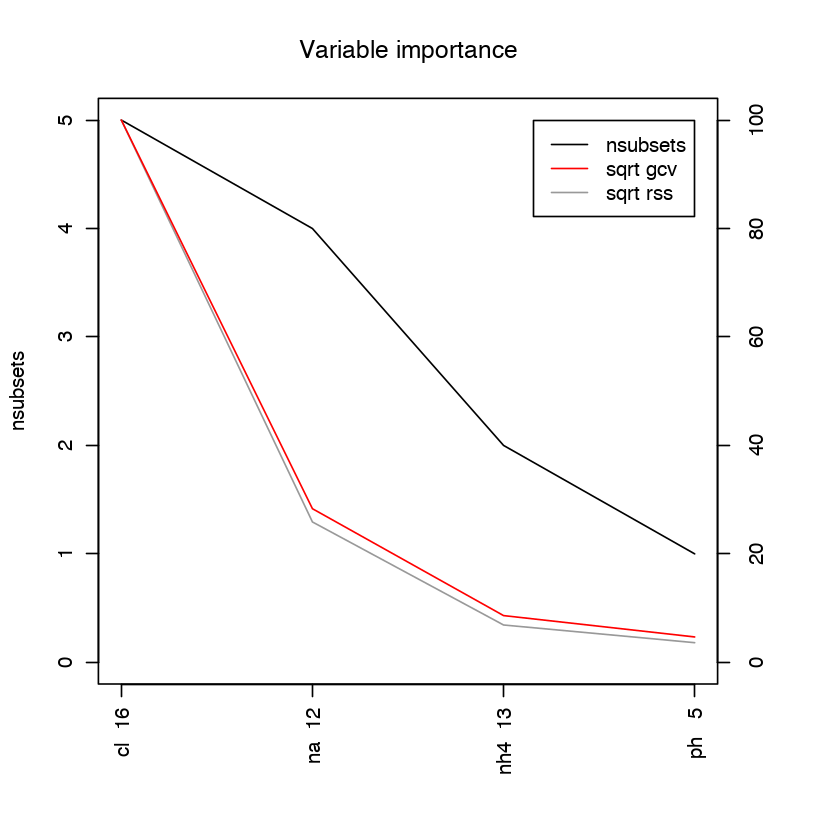

In [97]:
ev <- evimp (marsModel) # estimate variable importance
plot(ev)

In [98]:
install.packages('Boruta')
library('Boruta')

also installing the dependency ‘ranger’




The downloaded binary packages are in
	/var/folders/1d/lmv6zvsx7cq4l1j20rf9n8b80000gn/T//Rtmplu0m2w/downloaded_packages


Warning message:
“package ‘Boruta’ was built under R version 3.4.4”Loading required package: ranger
Warning message:
“package ‘ranger’ was built under R version 3.4.3”

In [99]:
# Decide if a variable is important or not using Boruta
boruta_output <- Boruta(elev ~ ., data=na.omit(df_num), doTrace=2)  # perform Boruta search


 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
After 11 iterations, +0.79 secs: 
 confirmed 10 attributes: ca, cl, dhl, hco3, k and 5 more;
 rejected 1 attribute: col;
 still have 8 attributes left.

 12. run of importance source...
 13. run of importance source...
 14. run of importance source...
 15. run of importance source...
 16. run of importance source...
 17. run of importance source...
 18. run of importance source...
 19. run of importance source...
After 19 iterations, +1.1 secs: 
 confirmed 1 attribute: co3;
 still have 7 attributes left.

 20. run of importance source...
 21. run of importance source...
 22. run of importance source...
 23. run of importance source...
 24

In [100]:
# Confirmed 10 attributes: Humidity, Inversion_base_height, Inversion_temperature, Month, Pressure_gradient and 5 more.
# Rejected 3 attributes: Day_of_month, Day_of_week, Wind_speed.
boruta_signif <- names(boruta_output$finalDecision[boruta_output$finalDecision %in% c("Confirmed", "Tentative")])  # collect Confirmed and Tentative variables
print(boruta_signif)  # significant variables

 [1] "dhl"  "tds"  "ph"   "hard" "ca"   "mn"   "k"    "na"   "nh4"  "co3" 
[11] "hco3" "cl"   "so4"  "no2"  "no3" 


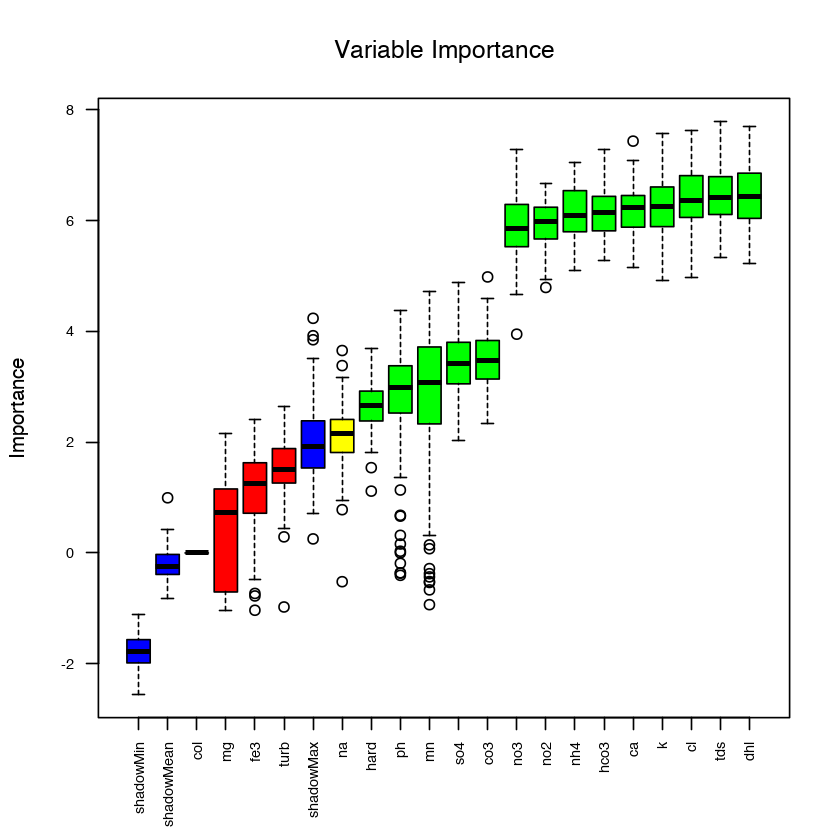

In [101]:
plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")  # plot variable importance

# References:
- http://www2.stat.unibo.it/montanari/Didattica/Multivariate/CA_lab.pdf
- http://cc.oulu.fi/~jarioksa/opetus/metodi/sessio3.pdf
- http://www2.stat.unibo.it/montanari/Didattica/Multivariate/PCA_lab1.pdf
- http://bioconductor.wustl.edu/bioc/vignettes/pcaMethods
- https://cran.r-project.org/web/packages/vegan/vignettes/intro-vegan.pdf
- http://cc.oulu.fi/~jarioksa/opetus/metodi/vegantutor.pdf
- https://www3.nd.edu/~mclark19/learn/GAMS.pdf
- http://r-statistics.co/Variable-Selection-and-Importance-With-R.html